### ARK Innovation ETF (ARKK)

## Technical Analysis

In [1]:
#import all necessary libraries
import numpy as np 
import pandas as pd
import pandas_datareader as web
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#The ARK Innovation ETF launched on October 31 2014 under the ticker ARKK.
#Set start of time frame as IPO, present as end
start = dt.datetime(2013, 12, 18)
end = dt.datetime.now()

#Store historical price data from Y! 
ARKK = web.DataReader('ARKK','yahoo',start,end)[['Adj Close']]

#Change in price from previous trading day; Daily gain/loss
ARKK['RET']=np.log(1+ARKK[['Adj Close']].pct_change())

In [3]:
ARKK.head()

,Adj Close,RET
Date,,
2014-10-31,18.697985,NaN
2014-11-03,18.697985,0.000000
2014-11-04,18.587893,-0.005905
2014-11-05,18.349350,-0.012916
2014-11-06,18.477795,0.006976


In [4]:
ARKK.tail()

,Adj Close,RET
Date,,
2021-09-28,112.139999,-0.042682
2021-09-29,109.720001,-0.021816
2021-09-30,110.529999,0.007355
2021-10-01,111.169998,0.005774
2021-10-04,107.190002,-0.036458


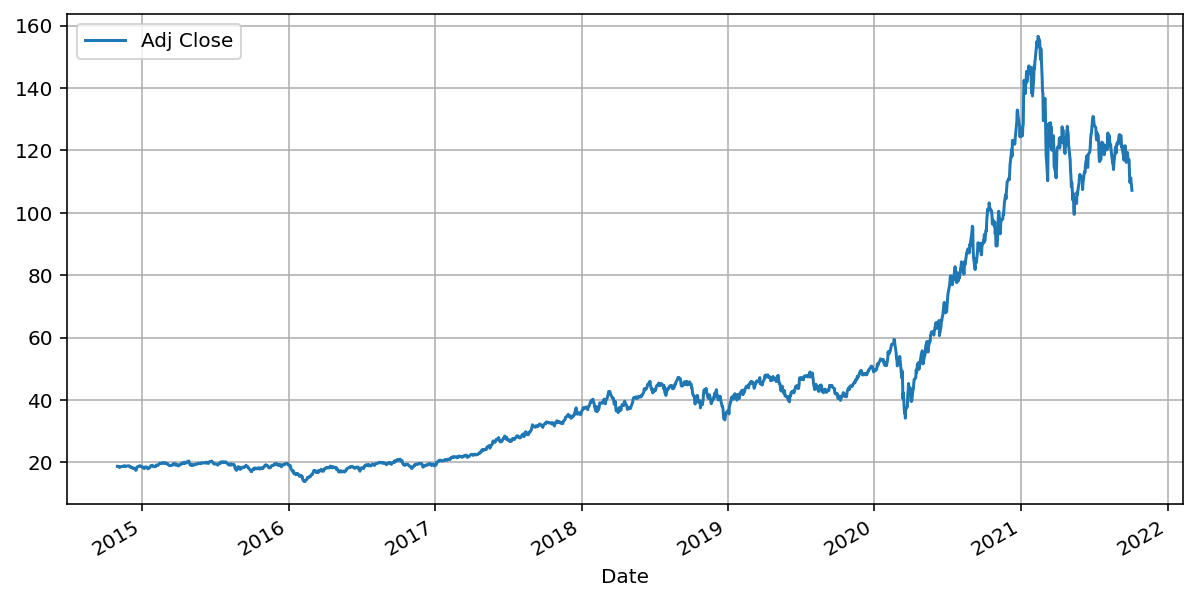

In [5]:
# Plot the ARKK price from start to end
ARKK.plot(y = 'Adj Close',figsize=(10,5), grid = True);

### Simple Moving Average

The Simple Moving Average is calculated using both the `rolling()` and `mean()` methods.

In [6]:
# Computing the 3-Day Simple Moving Average
ARKK['Adj Close'].rolling(3).mean().head(3)

Date
2014-10-31          NaN
2014-11-03          NaN
2014-11-04    18.661287
Name: Adj Close, dtype: float64

In [7]:
# Computing the 20-Day Simple Moving Standard Deviation
ARKK['Adj Close'].rolling(20).std().head(20)

Date
2014-10-31         NaN
2014-11-03         NaN
2014-11-04         NaN
2014-11-05         NaN
2014-11-06         NaN
2014-11-07         NaN
2014-11-10         NaN
2014-11-11         NaN
2014-11-12         NaN
2014-11-13         NaN
2014-11-14         NaN
2014-11-17         NaN
2014-11-18         NaN
2014-11-19         NaN
2014-11-20         NaN
2014-11-21         NaN
2014-11-24         NaN
2014-11-25         NaN
2014-11-26         NaN
2014-11-28    0.144006
Name: Adj Close, dtype: float64

In [8]:
# Computing the 30-Day and 200-Day Simple Moving Averages
ARKK['30D_Mean'] = ARKK['Adj Close'].rolling(30).mean()
ARKK['200D_Mean'] = ARKK['Adj Close'].rolling(200).mean()

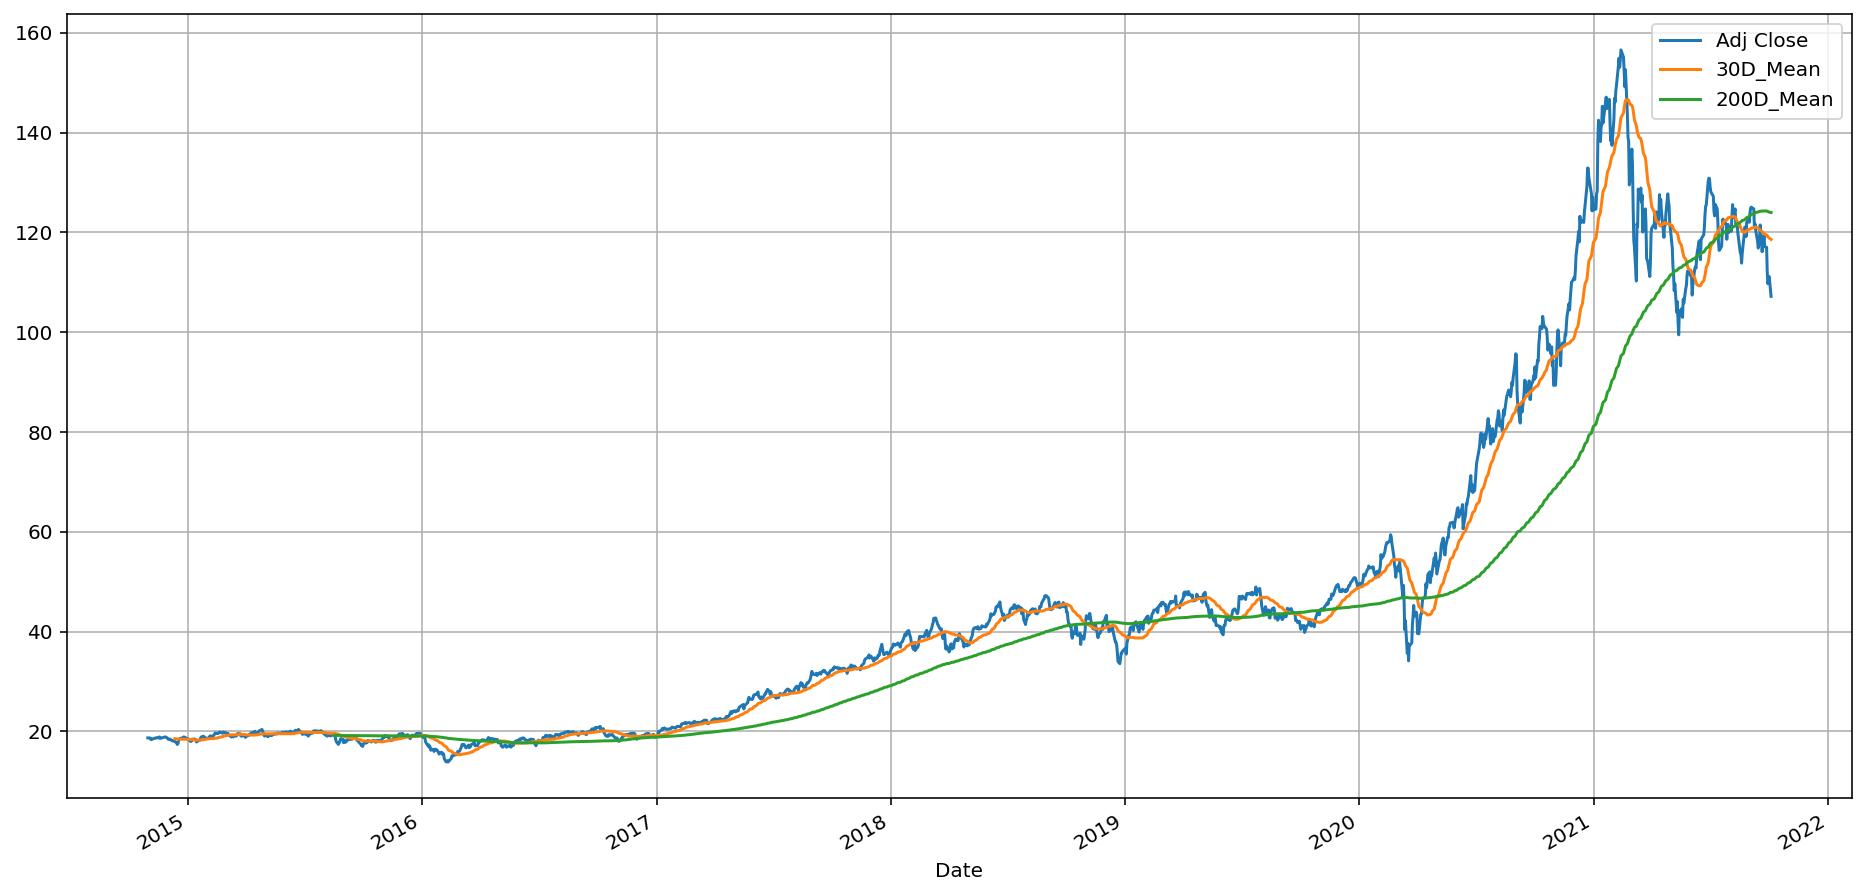

In [9]:
#When the shorter-term MA crosses above the longer-term MA, it's a buy signal, 
    #It indicates that the trend is shifting up. This is known as a "golden cross."
#Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal
    #This indicates that the trend is shifting down. This is known as a "dead/death cross."

ARKK.plot(y = ['Adj Close','30D_Mean','200D_Mean'],
           figsize=(16,8), grid = True);

ARKK.plot(y = ['Adj Close','30D_Mean','200D_Mean'],
           figsize=(16,8), grid = True);

### Bollinger Bands

 Bollinger Bands are volatility bands around a moving average.

In [10]:
ARKK['Upper_BBand'] = ARKK['30D_Mean'] + 2*ARKK['Adj Close'].rolling(30).std()
ARKK['Lower_BBand'] = ARKK['30D_Mean'] - 2*ARKK['Adj Close'].rolling(30).std()

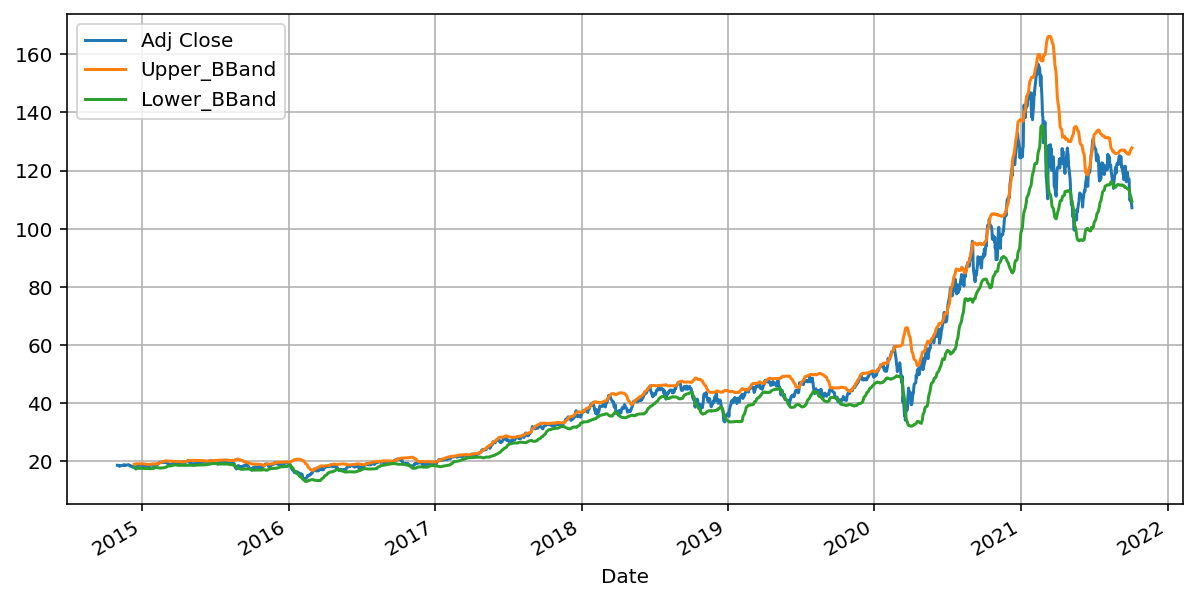

In [11]:
ARKK.plot(y = ['Adj Close','Upper_BBand','Lower_BBand'],
          figsize=(10,5), grid = True);

### Simple Moving Average Algorithmic Trading Strategy

Go long (Buy or +1) the asset when the short window MA (SMA) is higher than the long window MA (LMA), and Go Short (Sell or -1) otherwise 

In [12]:
ARKKv2 = ARKK[['Adj Close', 'RET']].copy()
ARKKv2.head()

,Adj Close,RET
Date,,
2014-10-31,18.697985,NaN
2014-11-03,18.697985,0.000000
2014-11-04,18.587893,-0.005905
2014-11-05,18.349350,-0.012916
2014-11-06,18.477795,0.006976


In [13]:
SMA = 30
LMA = 200
ARKKv2['SMA']=ARKKv2['Adj Close'].rolling(SMA).mean()
ARKKv2['LMA']=ARKKv2['Adj Close'].rolling(LMA).mean()
ARKKv2.dropna(inplace=True)
ARKKv2.head()

,Adj Close,RET,SMA,LMA
Date,,,,
2015-08-18,19.248466,-0.006509,19.597351,19.205132
2015-08-19,19.037451,-0.011023,19.596433,19.206829
2015-08-20,18.248426,-0.042329,19.564016,19.204581
2015-08-21,17.918140,-0.018265,19.513861,19.201232
2015-08-24,17.395182,-0.029620,19.438017,19.196461


In [14]:
#Method 1
ARKKv2.loc[ARKKv2['SMA']>ARKKv2['LMA'],'Position']= 1
ARKKv2.loc[ARKKv2['SMA']<=ARKKv2['LMA'],'Position']= -1

In [15]:
#Method 2
#ARKKv2['Trading Decision2']= np.where(ARKKv2['SMA']>ARKKv2['LMA'],1,-1)

In [16]:
ARKKv2.tail()

,Adj Close,RET,SMA,LMA,Position
Date,,,,,
2021-09-28,112.139999,-0.042682,119.352666,124.243173,-1.0
2021-09-29,109.720001,-0.021816,119.147000,124.182176,-1.0
2021-09-30,110.529999,0.007355,118.970000,124.123359,-1.0
2021-10-01,111.169998,0.005774,118.880666,124.067496,-1.0
2021-10-04,107.190002,-0.036458,118.593666,123.993455,-1.0


In [17]:
ARKKv2['Strategy']=ARKKv2['Position'].shift(1)*ARKKv2['RET']
ARKKv2.dropna(inplace=True)

In [18]:
ARKKv2['C_RET']=ARKKv2['RET'].cumsum()
ARKKv2['C_Strategy']=ARKKv2['Strategy'].cumsum()

In [19]:
ARKKv2.head()

,Adj Close,RET,SMA,LMA,Position,Strategy,C_RET,C_Strategy
Date,,,,,,,,
2015-08-19,19.037451,-0.011023,19.596433,19.206829,1.0,-0.011023,-0.011023,-0.011023
2015-08-20,18.248426,-0.042329,19.564016,19.204581,1.0,-0.042329,-0.053353,-0.053353
2015-08-21,17.918140,-0.018265,19.513861,19.201232,1.0,-0.018265,-0.071618,-0.071618
2015-08-24,17.395182,-0.029620,19.438017,19.196461,1.0,-0.029620,-0.101238,-0.101238
2015-08-25,17.780521,0.021910,19.371195,19.192975,1.0,0.021910,-0.079328,-0.079328


In [20]:
ARKKv2[['C_RET','C_Strategy']].tail(1)

,C_RET,C_Strategy
Date,,
2021-10-04,1.717172,0.156919


In [21]:
ARKKv2[['RET','Strategy']].std()*250**0.5

RET         0.321841
Strategy    0.322318
dtype: float64

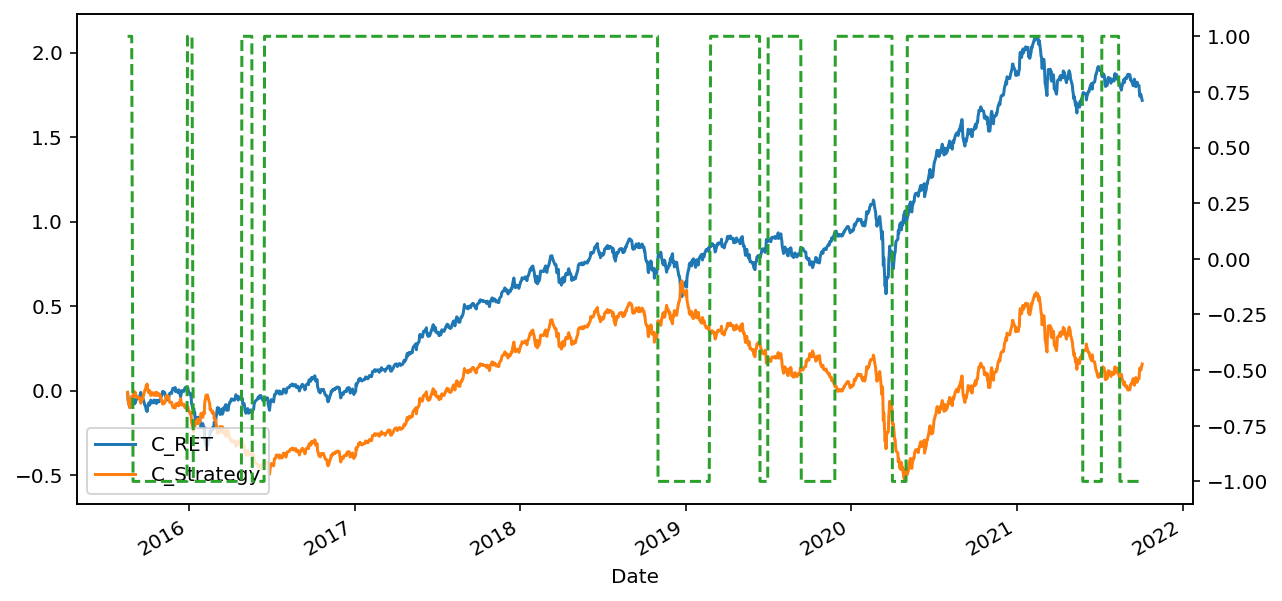

In [22]:
ax = ARKKv2.plot(y = ['C_RET','C_Strategy'],
             figsize=(10,5), grid = True)
ARKKv2['Position'].plot(ax=ax,secondary_y='Position',style='--')
ax.legend(loc='lower left');